## Extracción, transformación y carga de datos (ETL)

In [3]:
import sys
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

*Importo un archivo csv en el cual guardé los datos de las 500 empresas que cumplen con los estándares del índice sp500.*

In [5]:
df_company = pd.read_csv('Datasets/EMPRESAS_S&P500.csv', sep=';')
df_company

,Symbol,Security,GICS Sector,CIK
0,MMM,3M,Industrials,66740
1,AOS,A. O. Smith,Industrials,91142
2,ABT,Abbott,Health Care,1800
3,ABBV,AbbVie,Health Care,1551152
4,ACN,Accenture,Information Technology,1467373
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,1041061
499,ZBRA,Zebra Technologies,Information Technology,877212
500,ZBH,Zimmer Biomet,Health Care,1136869
501,ZION,Zions Bancorporation,Financials,109380


In [6]:
#Elimino la columna CIK
df_company.drop(columns=('CIK'), inplace=True)

In [7]:
#Renombro las columnas de interés
df_company.rename(columns={'Security':'Company', 'GICS Sector': 'Sector'}, inplace=True)

In [8]:
df_company

,Symbol,Company,GICS Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott,Health Care
3,ABBV,AbbVie,Health Care
4,ACN,Accenture,Information Technology
...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary
499,ZBRA,Zebra Technologies,Information Technology
500,ZBH,Zimmer Biomet,Health Care
501,ZION,Zions Bancorporation,Financials


In [9]:
df_company['GICS\xa0Sector']#no tengo idea porque, pero esta columna no permite cambiar el nombre
#ademas hay que agregarle \xa0 al medio porque sino no lo reconoce

0                 Industrials
1                 Industrials
2                 Health Care
3                 Health Care
4      Information Technology
                ...          
498    Consumer Discretionary
499    Information Technology
500               Health Care
501                Financials
502               Health Care
Name: GICS Sector, Length: 503, dtype: object

In [10]:
# Creo un DataFrame vacío para almacenar los datos que importo desde yfinance
df_sp500_empresas = pd.DataFrame()

*Itero cada valor dentro de cada fila del df_company, y utilizo el valor de la columna Symbol para descargar la data de cada empresa con yfinance. Finalmente agrego esa información al nuevo dataframe junto con los valores correspondientes del sector y el nombre de la empresa (company).* 

In [11]:
for i, serie in df_company.iterrows():
    symbol = serie['Symbol']
    company = serie['Company']
    sector = serie['GICS\xa0Sector']
    data = yf.download(symbol, start='2000-01-01', end='2023-01-01')
    if len(data) > 0:
        data['Symbol'] = symbol
        data['Company'] = company
        data['GICS\xa0Sector'] = sector
        df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe

[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed

C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe



[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed

C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe



[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


[*********************100%***********************]  1 of 1 completed


C:\Users\AlEx\AppData\Local\Temp\ipykernel_4424\3770422689.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sp500_empresas = df_sp500_empresas.append(data)# intenté usar concat pero no me figura como atributo del dataframe


*Agrego los días de la semana en una nueva columna, en este caso es posible hacerlo facilmente ya que el index tiene el formato date*

In [12]:
df_sp500_empresas['Day_Name'] = df_sp500_empresas.index.day_name()

In [13]:
df_sp500_empresas.head()

,Open,High,Low,Close,Adj Close,Volume,Symbol,Company,GICS Sector,Day_Name
Date,,,,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525518,2173400,MMM,3M,Industrials,Monday
2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511259,2713800,MMM,3M,Industrials,Tuesday
2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221231,3699400,MMM,3M,Industrials,Wednesday
2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249754,5975800,MMM,3M,Industrials,Thursday
2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790697,4101200,MMM,3M,Industrials,Friday


## Análisis Exploratorio de los datos (EDA)

#### **Detección y tratamiento de valores duplicados**

In [14]:
df_sp500_empresas[df_sp500_empresas.duplicated()]

,Open,High,Low,Close,Adj Close,Volume,Symbol,Company,GICS Sector,Day_Name
Date,,,,,,,,,,
2012-05-22,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Amcor,Materials,Tuesday
2012-05-23,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Amcor,Materials,Wednesday
2012-05-24,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Amcor,Materials,Thursday
2012-05-25,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Amcor,Materials,Friday
2012-05-29,7.700000,7.700000,7.700000,7.700000,5.306177,0,AMCR,Amcor,Materials,Tuesday
...,...,...,...,...,...,...,...,...,...,...
2002-02-08,12.373333,12.373333,12.373333,12.373333,12.372569,0,TTWO,Take-Two Interactive,Communication Services,Friday
2002-02-11,12.373333,12.373333,12.373333,12.373333,12.372569,0,TTWO,Take-Two Interactive,Communication Services,Monday
2002-02-12,12.373333,12.373333,12.373333,12.373333,12.372569,0,TTWO,Take-Two Interactive,Communication Services,Tuesday


 *Si bien los registros anteriores figuran como duplicados, las fechas a las cuales pertenecen son distintas. Por lo tanto decido incluír dichos valores en el análisis ya que pueden estar relacionados con periódos en los cuales el precio por acción se mantuvo estable*

#### **Detección y tratamiento de valores faltantes**

In [15]:
df_sp500_empresas.isna().sum()

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Symbol         0
Company        0
GICS Sector    0
Day_Name       0
dtype: int64

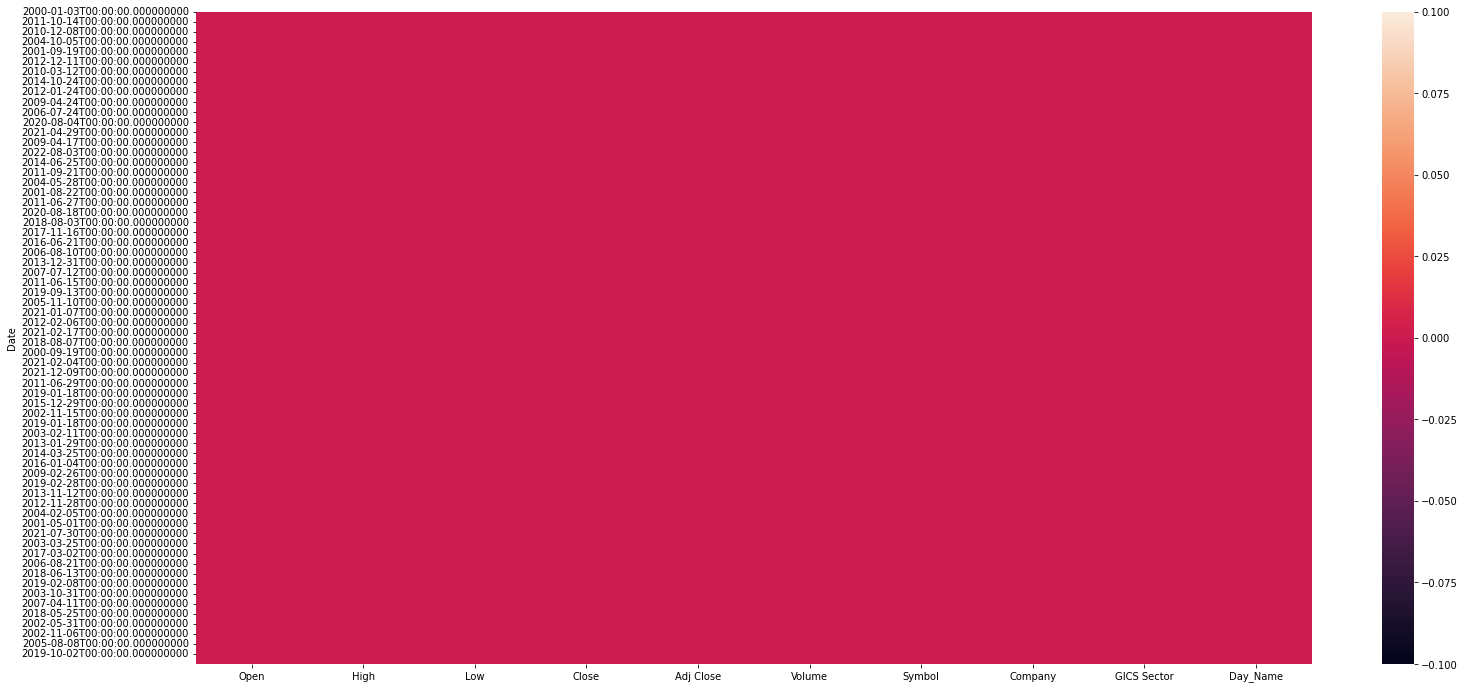

In [16]:
plt.figure(figsize= (25,12))
sb.heatmap(df_sp500_empresas.isnull())
plt.show()

*No se detectan valores faltantes*

#### **Detección y tratamiento de outliers**

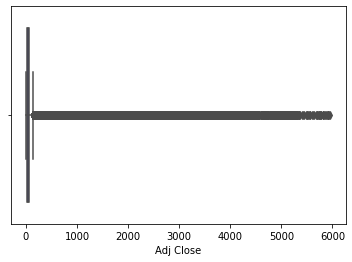

In [17]:
sb.boxplot(x = 'Adj Close', data = df_sp500_empresas, color= 'b')
plt.show()

In [15]:
df_sp500_empresas['Adj Close'].max()

5959.330078125

In [16]:
df_sp500_empresas['Adj Close'].min()

0.061041999608278275

*No se detectan precios negativos por acción. Tampoco existen valores que superen ampliamente el max() y se encuentren aislados*

#### **Nivel de correlación entre variables** 

C:\Users\AlEx\AppData\Local\Temp\ipykernel_1336\608694063.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
C:\Users\AlEx\AppData\Local\Temp\ipykernel_1336\608694063.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


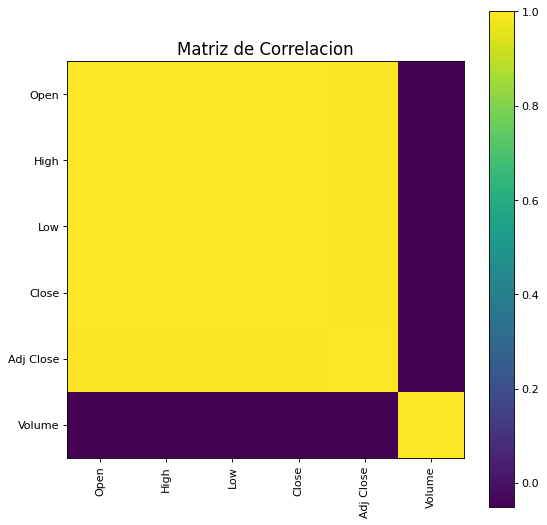

In [17]:

def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Matriz de Correlacion', fontsize=15)
    plt.show()

plotCorrelationMatrix(df_sp500_empresas,8)

*Agrego el cálculo del retorno diario en una nueva columna.*
*Tasa de retorno https://es.wikipedia.org/wiki/Tasa_de_retorno#C%C3%A1lculo.*

In [18]:
df_sp500_empresas['daily_return'] = (df_sp500_empresas['Adj Close']/ df_sp500_empresas['Adj Close'].shift(1)) -1

In [19]:
df_sp500_empresas.head(5)

,Open,High,Low,Close,Adj Close,Volume,Symbol,Company,GICS Sector,Day_Name,daily_return
Date,,,,,,,,,,,
2000-01-03,48.03125,48.25000,47.03125,47.1875,25.525517,2173400,MMM,3M,Industrials,Monday,NaN
2000-01-04,46.43750,47.40625,45.31250,45.3125,24.511265,2713800,MMM,3M,Industrials,Tuesday,-0.039735
2000-01-05,45.56250,48.12500,45.56250,46.6250,25.221245,3699400,MMM,3M,Industrials,Wednesday,0.028965
2000-01-06,47.15625,51.25000,47.15625,50.3750,27.249748,5975800,MMM,3M,Industrials,Thursday,0.080428
2000-01-07,50.56250,51.90625,49.96875,51.3750,27.790693,4101200,MMM,3M,Industrials,Friday,0.019851


*Con los valores del ^GSPC puedo ver la tendencia general a travéz de los años de los retornos diarios de las empresas que pertenecen al índice sp500.*

In [20]:

df_GSPC = yf.download('^GSPC', start = '2000-01-01', end = '2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [21]:
#pct_change es un método de pandas que simplifica el cálculo del
#daily_return (devuelve la diferencia de porcentajes entre el valor de una columna y por defecto el de la fila anterior)
df_GSPC['Day_Name'] = df_GSPC.index.day_name()
df_GSPC['daily_return']=df_GSPC['Adj Close'].pct_change() 

In [62]:
#df_GSPC.to_csv('Datasets/general.csv', decimal=',')

In [22]:
df_GSPC.head(5)

,Open,High,Low,Close,Adj Close,Volume,Day_Name,daily_return
Date,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,Monday,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,Tuesday,-0.038345
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,Wednesday,0.001922
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,Thursday,0.000956
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,Friday,0.027090


*Hasta ahora lo que hice fue generar dos dataframes, uno para presentar el contexto general(df_GSPC), y el otro para hacer la recomendacion de inversión, basandome en el rendimiento diario (df_sp500_empresas).*

In [19]:
df_sp500_empresas.to_csv('Datasets/sp500_empresas.csv', decimal = ',')

*Visualizo la tendencia del índice sp500 graficando el precio de cierre ajustado (por acción), en función de la fecha, abarcando más de 2 décadas de registros desde el año 2000 hasta la actualidad.*

*Elijo el Adj Close ya que este refleja el precio de cierre real de la acción, ajustado por cualquier evento corporativo que pueda afectar dicho precio, como dividendos, desdoblamientos (splits) de acciones o fusiones de empresas.*

In [24]:
import plotly.graph_objs as go
import pandas as pd

fig = go.Figure(data=go.Scatter(x=df_GSPC.index, y=df_GSPC['Adj Close']))
fig.update_layout(title='S&P 500 Index', xaxis_title='Date', yaxis_title=' Adjusted Closing Price')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=5, label="5y", step="year", stepmode="backward"),
                dict(label="All", step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

*Podemos observar fuertes caídas del índice que se corresponden con eventos históricos como el desplome de 2008 con la burbuja de la deuda inmobiliaria estadounidense y la pandemia del COVID-19 a fines del 2019 y principios del 2020*

Cantidad de empresas por sector, dentro del índice sp500

In [25]:
sp500_gb_sector = df_sp500_empresas.groupby('GICS\xa0Sector')['Symbol'].nunique()
sp500_gb_sector

GICS Sector
Communication Services    25
Consumer Discretionary    56
Consumer Staples          32
Energy                    23
Financials                66
Health Care               63
Industrials               70
Information Technology    76
Materials                 29
Real Estate               30
Utilities                 30
Name: Symbol, dtype: int64

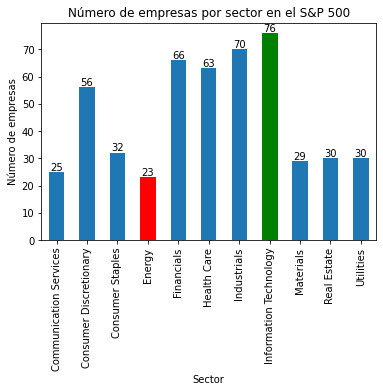

In [26]:
sp500_gb_sector.plot(kind='bar')

for i, v in enumerate(sp500_gb_sector.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.title('Número de empresas por sector en el S&P 500')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')

mayor_cantidad = np.argmax(sp500_gb_sector)
menor_cantidad = np.argmin(sp500_gb_sector)
plt.gca().patches[mayor_cantidad].set_color('g')
plt.gca().patches[menor_cantidad].set_color('r')
plt.show()

Cantidad de empresas por sector, dentro del índice sp500 hasta el 2018

In [27]:
df_sp500_empresas_2018 = df_sp500_empresas[df_sp500_empresas.index.year <= 2018]
emp_por_sector_2018 = df_sp500_empresas_2018.groupby('GICS\xa0Sector')['Symbol'].nunique()
emp_por_sector_2018

GICS Sector
Communication Services    23
Consumer Discretionary    56
Consumer Staples          32
Energy                    23
Financials                66
Health Care               61
Industrials               68
Information Technology    76
Materials                 27
Real Estate               30
Utilities                 29
Name: Symbol, dtype: int64

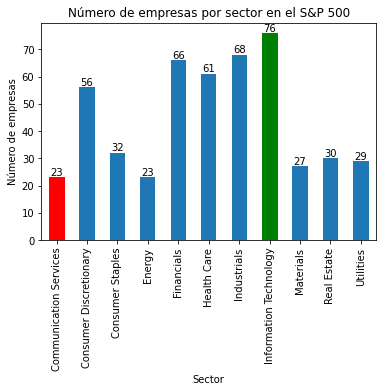

In [28]:
emp_por_sector_2018.plot(kind='bar')

for i, v in enumerate(emp_por_sector_2018.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.title('Número de empresas por sector en el S&P 500')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')

mayor_cantidad = np.argmax(emp_por_sector_2018)
menor_cantidad = np.argmin(emp_por_sector_2018)
plt.gca().patches[mayor_cantidad].set_color('g')
plt.gca().patches[menor_cantidad].set_color('r')
plt.show()

*Se puede observar que a partir del año 2018 se agregaron 2 empresas del sector 'Servicios de Comunicación' a la lista de empresas que integran el sp500.* 

Genero un nuevo dataframe con la cantidad de empresas por año y por sector 

In [29]:
sp500_sectores_año = df_sp500_empresas.groupby(['GICS\xa0Sector', pd.Grouper(freq='Y')])['Symbol'].nunique().reset_index()
sp500_sectores_año

,GICS Sector,Date,Symbol
0,Communication Services,2000-12-31,12
1,Communication Services,2001-12-31,12
2,Communication Services,2002-12-31,13
3,Communication Services,2003-12-31,13
4,Communication Services,2004-12-31,15
...,...,...,...
248,Utilities,2018-12-31,29
249,Utilities,2019-12-31,29
250,Utilities,2020-12-31,29
251,Utilities,2021-12-31,29


Crecimiento del número de empresas por sector en los últimos 23 años

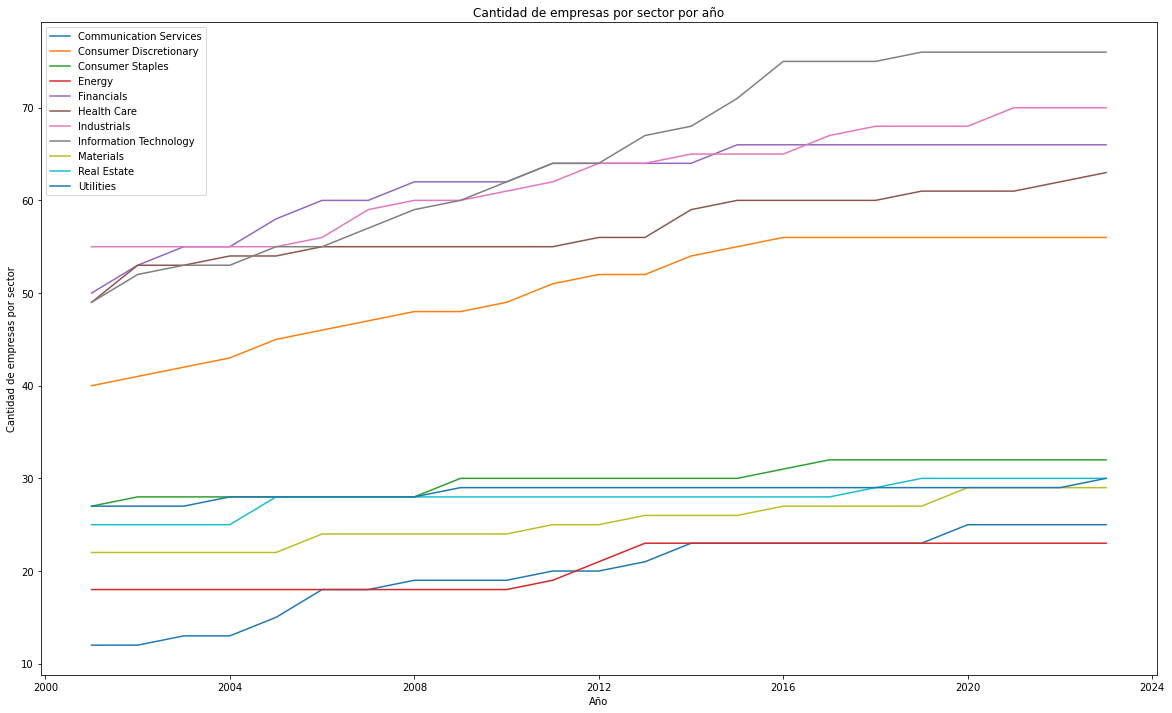

In [30]:
fig, ax = plt.subplots(figsize=(20,12))

# Iterar sobre cada sector y graficar su rendimiento promedio anual
for sector, data in sp500_sectores_año.groupby('GICS\xa0Sector'):
    ax.plot(data['Date'], data['Symbol'], label=sector)

# Agregar un título y etiquetas a los ejes
ax.set_title('Cantidad de empresas por sector por año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de empresas por sector')
ax.legend()


# Mostrar la gráfica
plt.show()

## Análisis de riesgo de inversión por Rendimiento y Volatilidad

In [31]:
#Defino una función que me permita calcular la volatilidad y el promedio del daily return de las acciones de una empresa en específico
def volatility_company(empresa):
    df_filter = df_sp500_empresas[df_sp500_empresas['Symbol']==empresa]
    std = df_filter['daily_return'].std()
    dr_prom = df_filter['daily_return'].mean()
    volatility = std/dr_prom
    return {'volatilidad': volatility,'rendimiento_medio': dr_prom}

In [32]:
volatility_company('MMM')

{'volatilidad': 39.75516855347176, 'rendimiento_medio': 0.00037842053345687495}

In [33]:
#Defino una función que me permita calcular la volatilidad y el promedio del daily return de las acciones de un sector en específico
def volatility_sector(sector):
    df_filter = df_sp500_empresas[(df_sp500_empresas['GICS\xa0Sector']==sector)]
    std = df_filter['daily_return'].std()
    dr_prom = df_filter['daily_return'].mean()
    volatility = std/dr_prom
    return {'volatilidad': volatility,'rendimiento_medio': dr_prom}

In [34]:
volatility_sector('Financials')

{'volatilidad': 55.86494148815909, 'rendimiento_medio': 0.000514909787324584}

*Los cálculos anteriores contienen el ruido propio de la cantidad de registros acumulados a lo largo de 2 décadas por lo tanto es necesario hacer la comparativa en periodos de tiempo más cortos*

*Agrupo el índice por sector y calculo la media del daily return por año* 

In [35]:
drprom_sector_year = df_sp500_empresas.groupby(['GICS\xa0Sector', df_sp500_empresas.index.year])['daily_return'].mean()
drprom_sector_year = drprom_sector_year.unstack('GICS\xa0Sector')
drprom_sector_year

GICS Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2000,-0.002614,-0.002959,-0.002251,-0.001376,-0.000477,-0.000632,-0.002226,-0.001872,-0.002929,-0.002051,-0.001588
2001,0.000959,0.001900,0.000140,-0.000365,0.000007,0.000167,0.000706,0.000829,0.000686,0.000494,-0.000168
2002,-0.000733,-0.000010,0.000071,0.000107,-0.000397,-0.000239,0.000061,-0.000911,0.000418,-0.000336,-0.000346
2003,0.001877,0.001948,0.000855,0.001359,0.001241,0.001419,0.001427,0.002610,0.001225,0.002327,0.001258
2004,0.000167,0.000993,0.000935,0.001448,0.000536,0.000812,0.001003,0.000659,0.000990,0.001059,0.000805
2005,-0.000310,0.000339,0.000235,0.001673,0.000564,0.000683,0.000462,0.000662,-0.000008,0.000899,0.000581
2006,0.001082,0.000667,0.000775,0.000833,0.000778,0.000705,0.000530,0.000775,0.001160,0.001401,0.000908
2007,0.000180,0.000056,0.000412,0.001386,-0.000131,0.000652,0.000491,0.000553,0.001252,-0.000083,0.000537
2008,-0.001536,-0.001159,-0.000557,-0.001273,-0.000885,-0.001053,-0.000775,-0.001570,-0.001274,-0.000404,-0.000960


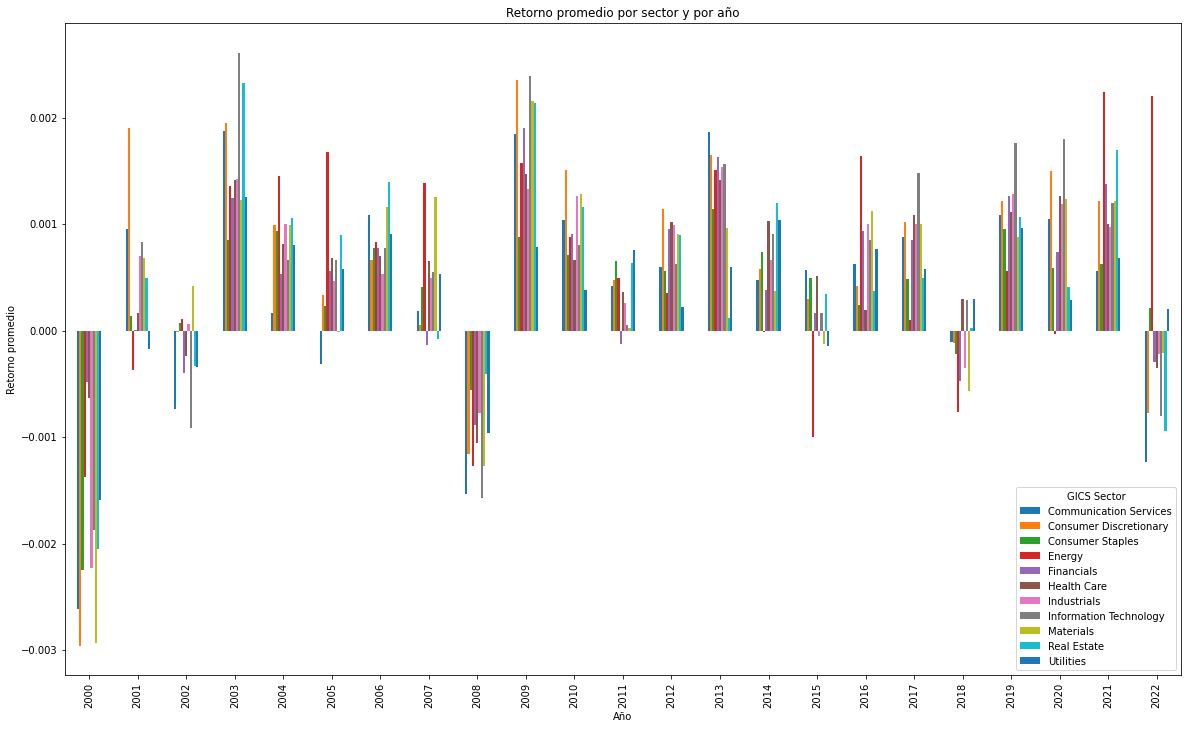

In [36]:
drprom_sector_year.plot(kind='bar', figsize=(20,12))
plt.xlabel('Año')
plt.ylabel('Retorno promedio')
plt.title('Retorno promedio por sector y por año')
plt.show()

*Rápidamente se evidencia cuales son los sectores cuyo rendimiento medio ha sido positivo en el último año. El sector energía es el más destacado*

In [37]:
dfsector = drprom_sector_year.describe().transpose()
dfsector

,count,mean,std,min,25%,50%,75%,max
GICS Sector,,,,,,,,
Communication Services,23.0,0.000380,0.001099,-0.002614,0.000028,0.000572,0.001043,0.001877
Consumer Discretionary,23.0,0.000620,0.001163,-0.002959,0.000177,0.000667,0.001360,0.002359
Consumer Staples,23.0,0.000378,0.000698,-0.002251,0.000224,0.000563,0.000759,0.001146
Energy,23.0,0.000589,0.001076,-0.001376,-0.000021,0.000558,0.001479,0.002244
Financials,23.0,0.000498,0.000750,-0.000885,-0.000129,0.000564,0.000947,0.001900
Health Care,23.0,0.000592,0.000674,-0.001053,0.000247,0.000683,0.001060,0.001473
Industrials,23.0,0.000546,0.000864,-0.002226,0.000162,0.000706,0.001098,0.001538
Information Technology,23.0,0.000645,0.001128,-0.001872,0.000224,0.000775,0.001342,0.002610
Materials,23.0,0.000513,0.001062,-0.002929,0.000006,0.000910,0.001188,0.002154


*Con la media de los rendimientos por sector y su desviación estandar, es posible calcular los niveles de volatilidad en los precios por acción de cada sector*

In [38]:
dfsector['volatility'] = dfsector['std']/dfsector['mean']

In [39]:
dfsector

,count,mean,std,min,25%,50%,75%,max,volatility
GICS Sector,,,,,,,,,
Communication Services,23.0,0.000380,0.001099,-0.002614,0.000028,0.000572,0.001043,0.001877,2.888194
Consumer Discretionary,23.0,0.000620,0.001163,-0.002959,0.000177,0.000667,0.001360,0.002359,1.875948
Consumer Staples,23.0,0.000378,0.000698,-0.002251,0.000224,0.000563,0.000759,0.001146,1.845102
Energy,23.0,0.000589,0.001076,-0.001376,-0.000021,0.000558,0.001479,0.002244,1.827959
Financials,23.0,0.000498,0.000750,-0.000885,-0.000129,0.000564,0.000947,0.001900,1.507086
Health Care,23.0,0.000592,0.000674,-0.001053,0.000247,0.000683,0.001060,0.001473,1.138511
Industrials,23.0,0.000546,0.000864,-0.002226,0.000162,0.000706,0.001098,0.001538,1.581198
Information Technology,23.0,0.000645,0.001128,-0.001872,0.000224,0.000775,0.001342,0.002610,1.748917
Materials,23.0,0.000513,0.001062,-0.002929,0.000006,0.000910,0.001188,0.002154,2.072142


*A menor volatilidad, mayor estabilidad en las fluctuaciones de los precios por acción a lo largo del tiempo. Sin embargo la volatilidad no nos indica en que dirección ocurren dichas fluctuaciones (no sabemos si el precio baja o sube), por lo tanto, como criterio elijo el o los sectores con mayor rendimiento y menor volatilidad posible.*

In [40]:
dfsector = dfsector.reset_index()

In [61]:
#dfsector.to_csv('Datasets/sectores.csv', decimal=',')

In [41]:
min_volatility = dfsector['volatility'].min()
sector_con_menor_volatilidad = dfsector['GICS\xa0Sector'][dfsector['volatility'] == min_volatility]
sector_con_menor_volatilidad 

5    Health Care
Name: GICS Sector, dtype: object

*El sector más seguro para invertir es el de Health Care ya que posee rendimientos positivos (aunque no los mas altos) pero tiene la tasa de volatilidad más baja*

In [42]:
max_return = dfsector['mean'].max()
sector_con_mayor_retorno = dfsector['GICS\xa0Sector'][dfsector['mean'] == max_return]
sector_con_mayor_retorno

7    Information Technology
Name: GICS Sector, dtype: object

*El sector con mayor tasa de retorno anual es Information Technology, aunque no posee la volatilidad más baja (tampoco la más alta)*

##### Recomendación de empresas 

In [43]:
df_Health_Care = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Health Care']
df_Information_Technology = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Information Technology']

Las 3 empresas con mayor tasa de retorno en los sectores de Health Care e Information Technology

In [44]:
df_Health_Care_recomendation = df_Health_Care.groupby('Company')['daily_return'].mean().nlargest(3)
df_Health_Care_recomendation

Company
Moderna      0.002610
Regeneron    0.001263
Dexcom       0.001221
Name: daily_return, dtype: float64

In [45]:
df_Information_Technology_recomendation = df_Information_Technology.groupby('Company')['daily_return'].mean().nlargest(3)
df_Information_Technology_recomendation

Company
Enphase      0.002340
SolarEdge    0.001688
Nvidia       0.001422
Name: daily_return, dtype: float64

Separo los datos por sector para procesarlos en power bi.

In [46]:
df_Industrials = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Industrials']

In [47]:
df_Consumer_Discretionary = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Consumer Discretionary']

In [48]:
df_Consumer_Staples = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Consumer Staples']

In [49]:
df_Energy = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Energy']

In [50]:
df_Materials = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Materials']

In [51]:
df_Utilities = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Utilities']

In [52]:
df_Real_Estate = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Real_Estate']

In [53]:
df_Information_Technology = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Information Technology']

In [54]:
df_Health_Care = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Health Care']

In [55]:
df_Financials = df_sp500_empresas[df_sp500_empresas['GICS\xa0Sector'] == 'Financials']

In [57]:
df_Consumer_Discretionary

,Open,High,Low,Close,Adj Close,Volume,Symbol,Company,GICS Sector,Day_Name,daily_return
Date,,,,,,,,,,,
2001-11-29,13.386667,14.466667,13.360000,13.880000,12.451973,371100,AAP,Advance Auto Parts,Consumer Discretionary,Thursday,-0.947869
2001-11-30,13.880000,14.266667,13.880000,14.266667,12.798857,165300,AAP,Advance Auto Parts,Consumer Discretionary,Friday,0.027858
2001-12-03,14.233333,14.233333,13.783333,13.783333,12.365250,127500,AAP,Advance Auto Parts,Consumer Discretionary,Monday,-0.033879
2001-12-04,13.783333,13.783333,13.233333,13.233333,11.871837,95400,AAP,Advance Auto Parts,Consumer Discretionary,Tuesday,-0.039903
2001-12-05,13.433333,14.783333,13.433333,14.666667,13.157705,598200,AAP,Advance Auto Parts,Consumer Discretionary,Wednesday,0.108313
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,128.429993,129.210007,127.839996,128.899994,128.309387,700800,YUM,Yum! Brands,Consumer Discretionary,Friday,0.000621
2022-12-27,129.300003,130.149994,128.639999,129.899994,129.304794,1300200,YUM,Yum! Brands,Consumer Discretionary,Tuesday,0.007758
2022-12-28,130.190002,130.860001,129.279999,129.309998,128.717514,964800,YUM,Yum! Brands,Consumer Discretionary,Wednesday,-0.004542


In [59]:
#Exporto los datos como csv
df_Consumer_Discretionary.to_csv('Datasets/Consumer_Discretionary.csv',decimal= ",")
df_Industrials.to_csv('Datasets/Industrials.csv',decimal= ",")
df_Health_Care.to_csv('Datasets/Health_Care.csv',decimal= ",")
df_Consumer_Staples.to_csv('Datasets/Consumer_Staples.csv',decimal= ",")
df_Energy.to_csv('Datasets/Energy.csv',decimal= ",")
df_Financials.to_csv('Datasets/Financials.csv',decimal= ",")
df_Materials.to_csv('Datasets/Materials.csv',decimal= ",")
df_Information_Technology.to_csv('Datasets/Information_Technology.csv',decimal= ",")
df_Real_Estate.to_csv('Datasets/Real_Estate.csv',decimal= ",")
df_Utilities.to_csv('Datasets/Utilities.csv',decimal= ",")